In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import string
import re
import spacy
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/datasetfix.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,eic90ad-1204-4a77-8ded-13e593766f33,Maulina Nia Rahma,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya ringan, fitur reksa dananya lengka...",2,17,4.0.1,19/11/2023 2:12:44,Terima kasih telah memberikan feedback terhada...,2023-11-23 1:59:26,4.0.1
1,aeb81eb7-5004-4a27-8ded-07e593866e33,Rachman Fadhilla,https://play-lh.googleusercontent.com/a-/ALV-U...,"Secara umum, jika sistem aplikasi yang digunak...",1,24,4.0.1,2023-11-21 6:21:44,"Mohon maaf atas ketidaknyamanannya, untuk kend...",2023-11-23 2:59:26,4.0.1
2,9a98caaa-0125-0862-1029-ae19bd93cb76,Maudi sintia,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bareksa adalah aplikasi investasi yang bagus, ...",4,5,4.0.1,2023-11-14 6:06:12,Terima kasih telah memberikan feedback terhada...,2023-11-16 3:50:04,4.0.1
3,ec3d76d6-3acf-4463-885a-b0b69e135307,Rachmawati Ariningsih,https://play-lh.googleusercontent.com/a/ACg8oc...,"Mw menambahkan, rekening tersebut terus ditola...",1,12,4.1.2000,2023-11-28 7:06:17,"Mohon maaf atas ketidaknyamanannya, untuk kend...",2023-12-01 4:19:58,4.1.2000
4,77ec6c12-1890-5f19-b760-d9a0af0c6b51,Muhammad Nur,https://play-lh.googleusercontent.com/a-/ALV-U...,Performa dan tampilan aplikasi sangat bagus ka...,5,0,4.0.1,2023-11-16 8:53:10,Terima kasih telah memberikan feedback terhada...,2023-11-18 3:18:06,4.0.1
...,...,...,...,...,...,...,...,...,...,...,...
2002,b61ee485-7303-4282-b214-529013c8e59b,Muhammad Tubagus,https://play-lh.googleusercontent.com/a/ACg8oc...,Mengapa upload bukti transaksi tertunda? Itu t...,3,2,3.7.2001,2023-10-13 1:47:47,Mohon maaf atas ketidaknyamanannya. Perihal pe...,2023-10-12 9:51:32,3.7.2001
2003,d5d0c794-059a-4f71-8148-e60ce787e87b,Reza Agustian,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya melakukan penarikan tanggal 9 september k...,3,0,1.7.10,2021-09-14 6:45:48,Perihal kendala bapak/ibu apakah sudah tersele...,2021-09-21 8:14:27,1.7.10
2004,497b3fef-3225-4730-b4fa-453ce04fe95a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Transaksi lambat banget, aplikasi kurang bagus",3,0,NaN,2019-04-16 11:22:18,Silahkan update aplikasi Bareksa Anda ke versi...,2019-12-16 15:22:44,NaN
2005,d17fb53b-2528-4feb-88e2-68d1749dff0f,Ronika Epiphani Gultom,https://play-lh.googleusercontent.com/a/ACg8oc...,Mohon maaf kebetulan ektp yang buram tidak bis...,3,0,2.10.2000,2022-10-05 13:04:41,Terima kasih telah memberikan feedback terhada...,2022-10-06 3:49:23,2.10.2000


In [ ]:
print('Ukuran Dataset :', df.shape)
print('Kolom :', df.columns)

Ukuran Dataset : (2007, 11)
Kolom : Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [ ]:
kolom_hapus = ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','repliedAt', 'appVersion', 'at']
df = df.drop(kolom_hapus, axis=1)

df.head(10)

,content,score
0,"Aplikasinya ringan, fitur reksa dananya lengka...",2
1,"Secara umum, jika sistem aplikasi yang digunak...",1
2,"Bareksa adalah aplikasi investasi yang bagus, ...",4
3,"Mw menambahkan, rekening tersebut terus ditola...",1
4,Performa dan tampilan aplikasi sangat bagus ka...,5
5,Kesalahan validasi muatan. Sampai ulasan ini d...,1
6,"Stok fitur aplikasi tidak lengkap, tampilan bi...",3
7,"Tampilannya kurang jelas, apalagi di dark mode...",1
8,Saya telah menggunakan aplikasi ini sejak tahu...,5
9,Setelah menghubungi Cs. Lewat telpon akhirnya ...,5


## Handling Missing value-Ignore tuple




In [ ]:
df.dropna(subset=['content'],inplace = True)

In [ ]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2002     True
2003     True
2004    False
2005     True
2006     True
Length: 2007, dtype: bool>

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       content  score
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
2002    False  False
2003    False  False
2004    False  False
2005    False  False
2006    False  False

[2007 rows x 2 columns]>

In [ ]:
df.shape

(2007, 2)

# Teks Peprocessing

tahapan pada teks preprocessing yakni :
- Tokenizing
- Clean & Case Folding
- Normalisasi
- Stopword
- Lemmatization

## Tokenizing serta Clean & Case Folding

In [ ]:
import pandas as pd
import re

# Fungsi untuk memisahkan tanda baca yang terhubung dengan kata
def separate_punctuation(text):
    # Define pattern to separate punctuation
    pattern = r'(?<=[A-Za-z])([.,!?])|([.,!?])(?=[A-Za-z])'
    separated_text = re.sub(pattern, r' \1\2 ', text)
    return separated_text

# Fungsi untuk membersihkan teks
def clean_text(df, text_field, new_text_field_name):
    # Lowercasing
    df[new_text_field_name] = df[text_field].apply(lambda x: ' '.join(x)).str.lower()
    # Menghapus tanda baca, mention, link, dan karakter khusus lainnya
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Menghapus angka
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    # Pisahkan tanda baca yang terhubung dengan kata
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: separate_punctuation(elem))
    # Tokenisasi kembali setelah pemisahan tanda baca
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: x.split())
    return df

# Tokenisasi awal
df['text_token'] = df['content'].apply(lambda x: x.split())

# Pembersihan teks
df = clean_text(df, 'text_token', 'text_clean')

# Menampilkan DataFrame
df

,content,score,text_token,text_clean
0,"Aplikasinya ringan, fitur reksa dananya lengka...",2,"[Aplikasinya, ringan,, fitur, reksa, dananya, ...","[aplikasinya, ringan, fitur, reksa, dananya, l..."
1,"Secara umum, jika sistem aplikasi yang digunak...",1,"[Secara, umum,, jika, sistem, aplikasi, yang, ...","[secara, umum, jika, sistem, aplikasi, yang, d..."
2,"Bareksa adalah aplikasi investasi yang bagus, ...",4,"[Bareksa, adalah, aplikasi, investasi, yang, b...","[bareksa, adalah, aplikasi, investasi, yang, b..."
3,"Mw menambahkan, rekening tersebut terus ditola...",1,"[Mw, menambahkan,, rekening, tersebut, terus, ...","[mw, menambahkan, rekening, tersebut, terus, d..."
4,Performa dan tampilan aplikasi sangat bagus ka...,5,"[Performa, dan, tampilan, aplikasi, sangat, ba...","[performa, dan, tampilan, aplikasi, sangat, ba..."
...,...,...,...,...
2002,Mengapa upload bukti transaksi tertunda? Itu t...,3,"[Mengapa, upload, bukti, transaksi, tertunda?,...","[mengapa, upload, bukti, transaksi, tertunda, ..."
2003,Saya melakukan penarikan tanggal 9 september k...,3,"[Saya, melakukan, penarikan, tanggal, 9, septe...","[saya, melakukan, penarikan, tanggal, septembe..."
2004,"Transaksi lambat banget, aplikasi kurang bagus",3,"[Transaksi, lambat, banget,, aplikasi, kurang,...","[transaksi, lambat, banget, aplikasi, kurang, ..."
2005,Mohon maaf kebetulan ektp yang buram tidak bis...,3,"[Mohon, maaf, kebetulan, ektp, yang, buram, ti...","[mohon, maaf, kebetulan, ektp, yang, buram, ti..."


## Normalisasi

In [ ]:
import pandas as pd

# Membaca kamus bahasa dari file CSV
data_kamus = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/kamus_normalization.csv')

# Fungsi untuk normalisasi
def normalisasi(teks, kamus):
    kalimat_final = []
    for kata in teks:
        kata_benar = kamus[kamus['Tidak Baku'] == kata]['Baku'].values
        if len(kata_benar) > 0:
            kalimat_final.append(kata_benar[0])
        else:
            kalimat_final.append(kata)
    return kalimat_final


# Normalisasi teks
df['content_norm'] = df['text_clean'].apply(lambda x: normalisasi(x, data_kamus))

df


,content,score,text_token,text_clean,content_norm
0,"Aplikasinya ringan, fitur reksa dananya lengka...",2,"[Aplikasinya, ringan,, fitur, reksa, dananya, ...","[aplikasinya, ringan, fitur, reksa, dananya, l...","[aplikasinya, ringan, fitur, reksa, dananya, l..."
1,"Secara umum, jika sistem aplikasi yang digunak...",1,"[Secara, umum,, jika, sistem, aplikasi, yang, ...","[secara, umum, jika, sistem, aplikasi, yang, d...","[secara, umum, jika, sistem, aplikasi, yang, d..."
2,"Bareksa adalah aplikasi investasi yang bagus, ...",4,"[Bareksa, adalah, aplikasi, investasi, yang, b...","[bareksa, adalah, aplikasi, investasi, yang, b...","[bareksa, adalah, aplikasi, investasi, yang, b..."
3,"Mw menambahkan, rekening tersebut terus ditola...",1,"[Mw, menambahkan,, rekening, tersebut, terus, ...","[mw, menambahkan, rekening, tersebut, terus, d...","[mau, menambahkan, rekening, tersebut, terus, ..."
4,Performa dan tampilan aplikasi sangat bagus ka...,5,"[Performa, dan, tampilan, aplikasi, sangat, ba...","[performa, dan, tampilan, aplikasi, sangat, ba...","[performa, dan, tampilan, aplikasi, sangat, ba..."
...,...,...,...,...,...
2002,Mengapa upload bukti transaksi tertunda? Itu t...,3,"[Mengapa, upload, bukti, transaksi, tertunda?,...","[mengapa, upload, bukti, transaksi, tertunda, ...","[mengapa, upload, bukti, transaksi, tertunda, ..."
2003,Saya melakukan penarikan tanggal 9 september k...,3,"[Saya, melakukan, penarikan, tanggal, 9, septe...","[saya, melakukan, penarikan, tanggal, septembe...","[saya, melakukan, penarikan, tanggal, septembe..."
2004,"Transaksi lambat banget, aplikasi kurang bagus",3,"[Transaksi, lambat, banget,, aplikasi, kurang,...","[transaksi, lambat, banget, aplikasi, kurang, ...","[transaksi, lambat, banget, aplikasi, kurang, ..."
2005,Mohon maaf kebetulan ektp yang buram tidak bis...,3,"[Mohon, maaf, kebetulan, ektp, yang, buram, ti...","[mohon, maaf, kebetulan, ektp, yang, buram, ti...","[mohon, maaf, kebetulan, ektp, yang, buram, ti..."


## STOPWORD REMOVAL

In [ ]:
# Daftar kata-kata stop words tambahan
more_stopwords = {
    'dar', 'hai', 'txffzhybv', 'bg', 'bot', 'yg', 'deh', 'ypdhl', 'tidak', 'nic', 'bos', 'hmmm', 'ky', 'yaa', 'mo', 'fb', 'laah', 'br', 'blg', 'da', 'x', 'jt', 'dan',
    'y', 'b', 't', 'yang', 'sj', 'faq', 'jsajan', 'aja', 'mis', 'mf', 'hmm', 'jii', 'issi', 'the', 'kok', 'ng', 'di', 'nih', 'lah', 'adm', 'nig', 'min', 'y', 'kak', 'k', 'va',
    'dong', 'ai', 'nya', 'e', 'tuh', 'nih', 'di' , 'min','ke', 'dgn', 'nya', 'jadi', 'ada', 'nya', 'ah', 'aamiin', 'hehehe', 'hhhh', 'hey', 'hmmm', 'hmm', 'ram', 'the', 'tfr', 'wkwk'
}

# Membuat daftar kata-kata stop words
stop_words_factory = StopWordRemoverFactory()
stop_words = stop_words_factory.get_stop_words()
stop_words = stop_words.extend(more_stopwords)

# Menginisialisasi StopWordRemover dengan daftar stop words yang diperbarui
stopword_remover = stop_words_factory.create_stop_word_remover()

# Fungsi untuk menghapus stop words dari teks
def remove_stopwords(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return stopword_remover.remove(text)

#proses stopword
df['text_stopword'] = df['content_norm'].apply(remove_stopwords)

df

,content,score,text_token,text_clean,content_norm,text_stopword
0,"Aplikasinya ringan, fitur reksa dananya lengka...",2,"[Aplikasinya, ringan,, fitur, reksa, dananya, ...","[aplikasinya, ringan, fitur, reksa, dananya, l...","[aplikasinya, ringan, fitur, reksa, dananya, l...",aplikasinya ringan fitur reksa dananya lengkap...
1,"Secara umum, jika sistem aplikasi yang digunak...",1,"[Secara, umum,, jika, sistem, aplikasi, yang, ...","[secara, umum, jika, sistem, aplikasi, yang, d...","[secara, umum, jika, sistem, aplikasi, yang, d...",umum sistem aplikasi digunakan aplikasi standa...
2,"Bareksa adalah aplikasi investasi yang bagus, ...",4,"[Bareksa, adalah, aplikasi, investasi, yang, b...","[bareksa, adalah, aplikasi, investasi, yang, b...","[bareksa, adalah, aplikasi, investasi, yang, b...",bareksa aplikasi investasi bagus ringan jelas ...
3,"Mw menambahkan, rekening tersebut terus ditola...",1,"[Mw, menambahkan,, rekening, tersebut, terus, ...","[mw, menambahkan, rekening, tersebut, terus, d...","[mau, menambahkan, rekening, tersebut, terus, ...",mau menambahkan rekening tersebut terus ditola...
4,Performa dan tampilan aplikasi sangat bagus ka...,5,"[Performa, dan, tampilan, aplikasi, sangat, ba...","[performa, dan, tampilan, aplikasi, sangat, ba...","[performa, dan, tampilan, aplikasi, sangat, ba...",performa tampilan aplikasi sangat bagus ringan...
...,...,...,...,...,...,...
2002,Mengapa upload bukti transaksi tertunda? Itu t...,3,"[Mengapa, upload, bukti, transaksi, tertunda?,...","[mengapa, upload, bukti, transaksi, tertunda, ...","[mengapa, upload, bukti, transaksi, tertunda, ...",upload bukti transaksi tertunda terus gagal pe...
2003,Saya melakukan penarikan tanggal 9 september k...,3,"[Saya, melakukan, penarikan, tanggal, 9, septe...","[saya, melakukan, penarikan, tanggal, septembe...","[saya, melakukan, penarikan, tanggal, septembe...",melakukan penarikan tanggal september kemarin ...
2004,"Transaksi lambat banget, aplikasi kurang bagus",3,"[Transaksi, lambat, banget,, aplikasi, kurang,...","[transaksi, lambat, banget, aplikasi, kurang, ...","[transaksi, lambat, banget, aplikasi, kurang, ...",transaksi lambat banget aplikasi kurang bagus
2005,Mohon maaf kebetulan ektp yang buram tidak bis...,3,"[Mohon, maaf, kebetulan, ektp, yang, buram, ti...","[mohon, maaf, kebetulan, ektp, yang, buram, ti...","[mohon, maaf, kebetulan, ektp, yang, buram, ti...",mohon maaf kebetulan ektp buram bisa terbaca k...


## Lemmatisasi

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from spacy.tokens import Token
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi lemmatization menggunakan Sastrawi
def lemmatize_indonesian(token):
    return stemmer.stem(token.text)

# Tambahkan ekstensi untuk Token spaCy
Token.set_extension('lemma_indonesian', getter=lemmatize_indonesian, force=True)

# Inisialisasi spaCy dengan model bahasa Indonesia
nlp = spacy.blank('id')

# Tambahkan pipeline tokenizer spaCy
def custom_tokenizer(nlp):
    return spacy.tokenizer.Tokenizer(nlp.vocab)

nlp.tokenizer = custom_tokenizer(nlp)

# Contoh teks dalam bahasa Indonesia (harus diubah sesuai dengan kebutuhan)
data = df['text_stopword']
df = pd.DataFrame(data)

# Lakukan lemmatization pada kolom 'text_stopword'
df['hasil_lemma'] = df['text_stopword'].apply(lambda x: ' '.join([token._.lemma_indonesian for token in nlp(x)]))

# Tampilkan dataframe hasil
df


,text_stopword,hasil_lemma
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...
...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...


In [ ]:
df = df.rename(columns={'text_stopword' : 'text asli','hasil_lemma': 'text_prepro'})
df

,text asli,text_prepro
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...
...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...


In [ ]:
data = df

df = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv')
data.head(10)

,text asli,text_prepro
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...
5,kesalahan validasi muatan ulasan diupload lebi...,salah validasi muat ulas diupload lebih hari s...
6,stok fitur aplikasi lengkap tampilan biasa nam...,stok fitur aplikasi lengkap tampil biasa namun...
7,tampilannya kurang jelas di dark mode metode p...,tampil kurang jelas di dark mode metode bayar ...
8,telah menggunakan aplikasi sejak tahun merasa ...,telah guna aplikasi sejak tahun rasa iring jal...
9,menghubungi customer service lewat telepon akh...,hubung customer service lewat telepon akhir so...


In [ ]:
data

,text asli,text_prepro
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...
...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...


## Labelling

In [ ]:
 pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

lexiconpos = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/positifbersih.csv')
lexiconneg = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/negatifbersih.csv')

# Inisialisasi Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk melakukan pelabelan sentimen menggunakan VADER
def label_sentiment_vader(text, lexiconpos, lexiconneg):
    # Mendapatkan compound score dari VADER untuk teks
    compound_score = analyzer.polarity_scores(text)['compound']

    # Mengambil kata-kata dalam teks
    words = text.split()

    # Inisialisasi nilai score
    score = 0

    # Tentukan skor sentimen berdasarkan kata-kata dalam teks
    for word in words:
        if word in lexiconpos['word'].values:
            score += lexiconpos[lexiconpos['word'] == word]['weight'].values[0]
        elif word in lexiconneg['word'].values:
            score += lexiconneg[lexiconneg['word'] == word]['weight'].values[0]

    # Tentukan label sentimen berdasarkan nilai skor
    polarity = 'Positif' if score >= 0 else 'Negatif'

    return score, polarity

# Terapkan fungsi analisis sentimen pada kolom 'text_prepro'
labels = df['text_prepro'].apply(label_sentiment_vader, lexiconpos=lexiconpos, lexiconneg=lexiconneg)

# Pisahkan hasil labels menjadi skor dan polaritas
compound_scores, polarities = zip(*labels)

# Tambahkan kolom baru untuk skor dan sentimen
df['compound scores'] = compound_scores
df['Sentimen'] = polarities

# Menampilkan 10 baris pertama dari DataFrame
df.head(10)

# Menghitung jumlah sentimen positif, negatif, dan total
# Menghitung jumlah sentimen positif, negatif, dan total
jumlah_positif = df[df['Sentimen'] == 'Positif'].shape[0]
jumlah_negatif = df[df['Sentimen'] == 'Negatif'].shape[0]
jumlah_total = df.shape[0]

# Menampilkan hasil
print(f"Jumlah sentimen positif: {jumlah_positif}")
print(f"Jumlah sentimen negatif: {jumlah_negatif}")
print(f"Jumlah sentimen total: {jumlah_total}")



Jumlah sentimen positif: 1210
Jumlah sentimen negatif: 797
Jumlah sentimen total: 2007


In [ ]:
df

,text asli,text_prepro,compound scores,Sentimen
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...,16,Positif
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...,-11,Negatif
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...,9,Positif
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...,-1,Negatif
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...,4,Positif
...,...,...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...,-6,Negatif
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...,-11,Negatif
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus,2,Positif
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...,8,Positif


In [ ]:
data = df

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [ ]:
data

,text asli,text_prepro,compound scores,Sentimen
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...,16,Positif
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...,-11,Negatif
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...,9,Positif
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...,-1,Negatif
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...,4,Positif
...,...,...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...,-6,Negatif
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...,-11,Negatif
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus,2,Positif
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...,8,Positif


# PROSES PEMBOBOTAN KATA DENGAN TF-IDF


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
column = "text_prepro"

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek CountVectorizer dan TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks dengan CountVectorizer
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Transformasi teks dengan TfidfVectorizer
tfs = tfidf_vectorizer.fit_transform(data[column])
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

#yng typo dan spasi nyatu diganti di labelling atau engga di kamus normalisasi


,aamiin,abai,abal,acak,acara,acc,accnya,account,aceh,action,...,yaitu,yakin,yang,yo,youtube,youtuber,yowes,yuk,zaman,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv'

# Simpan DataFrame ke dalam file CSV
data.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [ ]:
data

,text asli,text_prepro,compound scores,Sentimen
0,aplikasinya ringan fitur reksa dananya lengkap...,aplikasi ringan fitur reksa dana lengkap cocok...,16,Positif
1,umum sistem aplikasi digunakan aplikasi standa...,umum sistem aplikasi guna aplikasi standard mi...,-11,Negatif
2,bareksa aplikasi investasi bagus ringan jelas ...,bareksa aplikasi investasi bagus ringan jelas ...,9,Positif
3,mau menambahkan rekening tersebut terus ditola...,mau tambah rekening sebut terus tolak alas ktp...,-1,Negatif
4,performa tampilan aplikasi sangat bagus ringan...,performa tampil aplikasi sangat bagus ringan f...,4,Positif
...,...,...,...,...
2002,upload bukti transaksi tertunda terus gagal pe...,upload bukti transaksi tunda terus gagal pesan...,-6,Negatif
2003,melakukan penarikan tanggal september kemarin ...,laku tari tanggal september kemarin kata sukse...,-11,Negatif
2004,transaksi lambat banget aplikasi kurang bagus,transaksi lambat banget aplikasi kurang bagus,2,Positif
2005,mohon maaf kebetulan ektp buram bisa terbaca k...,mohon maaf betul ektp buram bisa baca kamera h...,8,Positif


#Smote


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
column = "text_prepro"
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')


# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)

# Menampilkan hasil SMOTE
print("Sebelum SMOTE:")
print(y_train.value_counts())
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())




Sebelum SMOTE:
Sentimen
Positif    972
Negatif    633
Name: count, dtype: int64

Setelah SMOTE:
Sentimen
Positif    972
Negatif    972
Name: count, dtype: int64


In [ ]:
data = y_train

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train.csv'

# Simpan DataFrame ke dalam file CSV
data.to_csv(file_path, index=False)

#Klasifikasi


Evaluasi untuk k=5:

Classification Report - Cross-Validation (k=5):
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Accuracy: 0.9279835390946503
Precision: 0.9285078441928386
Recall: 0.9279835390946503
F1 Score: 0.9279615032371795


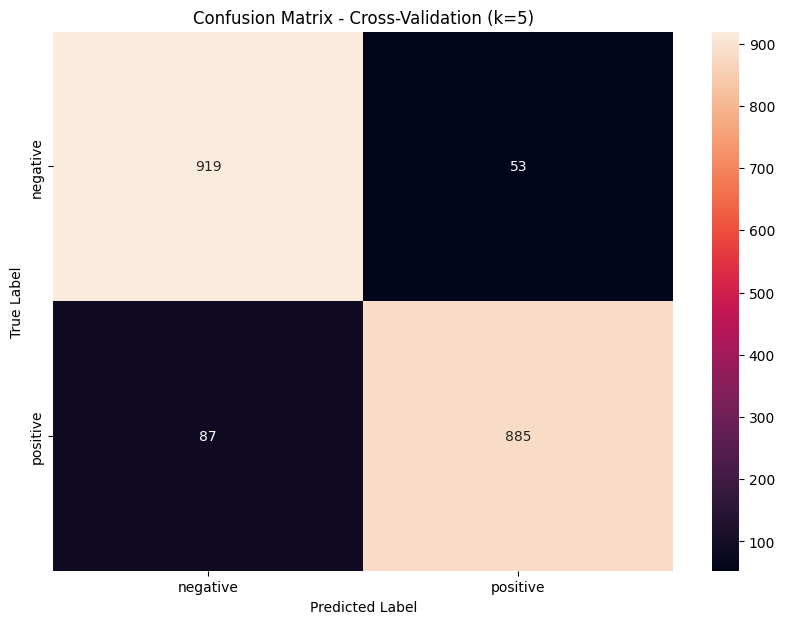


Evaluasi untuk k=7:

Classification Report - Cross-Validation (k=7):
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.94       972
     Positif       0.95      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Accuracy: 0.934156378600823
Precision: 0.9345169491525425
Recall: 0.934156378600823
F1 Score: 0.9341427161894921


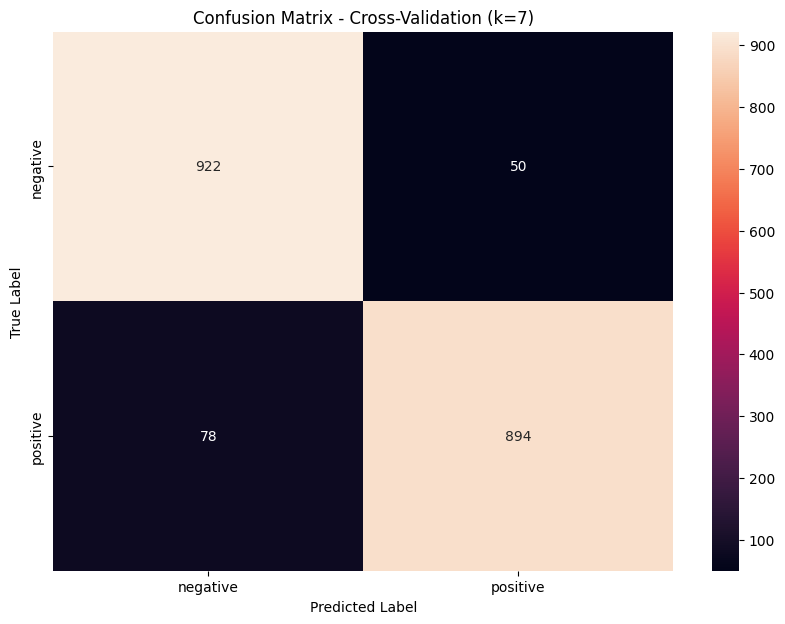


Evaluasi untuk k=9:

Classification Report - Cross-Validation (k=9):
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Accuracy: 0.9315843621399177
Precision: 0.9319688794768327
Recall: 0.9315843621399177
F1 Score: 0.9315691336965483


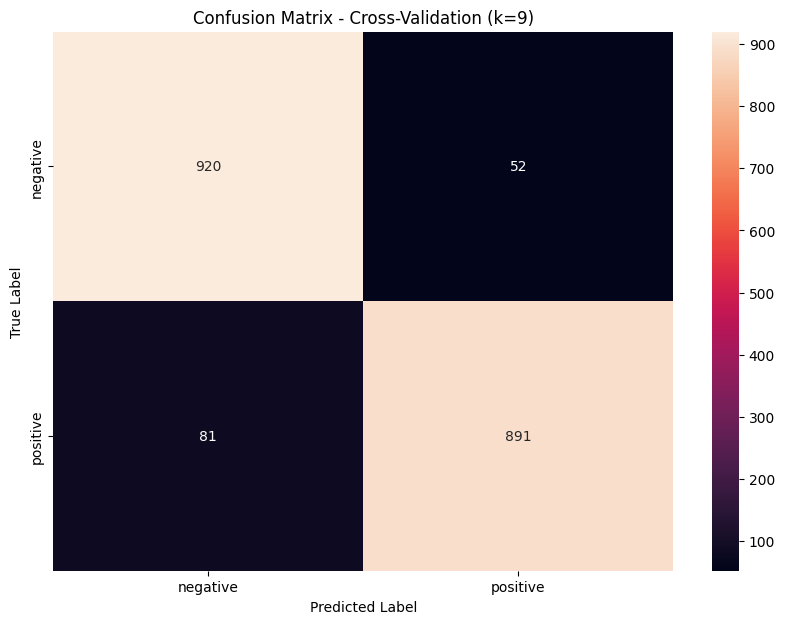

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data hasil resampling
X_train_resampled = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv').squeeze()
X_test = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv').iloc[len(X_train_resampled):]
y_test = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')['Sentimen'].iloc[len(X_train_resampled):]

# Membuat model SVM
modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

# Menentukan nilai k untuk k-fold cross-validation
k_values = [5, 7, 9]

# List untuk menyimpan metrik performa
performance_metrics = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
}

for k in k_values:
    print(f"\nEvaluasi untuk k={k}:\n")

    # K-Fold Cross Validation
    scores = cross_val_score(modelsvm, X_train_resampled, y_train_resampled, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train_resampled, y_train_resampled, cv=k)

    # Menampilkan hasil evaluasi
    print(f"Classification Report - Cross-Validation (k={k}):")
    print(classification_report(y_train_resampled, y_train_pred))

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')


    # Simpan metrik performa
    performance_metrics['k'].append(k)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


    # Confusion Matrix untuk evaluasi
    conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation (k={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [ ]:
modelsvm.fit(X_train_resampled, y_train_resampled)

SVC(C=1, gamma=0.01, kernel='linear')

In [ ]:
import joblib
filenamemodelbest = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+smote.pkl'
joblib.dump(modelsvm,filenamemodelbest)


['/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+smote.pkl']